In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# **The Euro on Forex**
## **Exploring Twenty Years of Volatility**
### Very Brief History
The currency exchange market has been around since coins were first used. At the end of the 1800s the development of the gold standard fixed currency values to a certain amount of gold, allowing for an internationally stable monetary system (1). Eventually the amount of gold was not enough to keep up with the demand for currency. After World War II the Bretton Woods Accord set the US Dollar as the global fixed currency. This created an adjustable rate exchange, but it was still determined by central banks and state actors (2). The US dollar was pegged to gold at the time, and during the 1970s the same liquidity problem (i.e. amount of gold vs currency in circulation) occurred. In August of 1971 President Richard Nixon unilaterally canceled direct international convertibility of the US dollar to gold, inadvertently beginning a regime of free-floating currencies (3).

### Today
The modern foreign exchange market (Forex, FX, or currency market) is a direct broker to dealer global marketplace that determines the market value and exchange rate of currencies all over the world. It is open 24 hours a day, 5 days a week. Currencies are always traded in pairs, and the value expressed is of one currency relative to another. For example, at the end of the day on 11/19/21 the Euro to US dollar rate was 1.13, or $1.13 equals €1. All of the twenty most traded currencies are free-floating, their value is determined by political conditions, economic factors and market psychology.

Forex is by far the largest financial market in the world, in 2019 having a daily volume of over $6.6 trillion (4). The Euro to US dollar (EURUSD) is the most traded currency pair, taking about 30% of the multi-billion dollar Forex turnover (5).

### Methodology
This study examines the more than two decades of exchange rates for the Euro. It uses the 2019 Triennial Central Bank Survey by the Bank for International Settlements to determine four currencies that represent large portions of the market and four currencies that represent small portions of the market. The highly traded currencies are the US dollar, Japanese yen, UK pound, and Australian dollar. The Israeli shekel, Phillipine peso, Malaysian ringgit, and Romanian leu comprise the group of least traded currencies.

The data set used is based on daily closing values provided by the European Central Bank and compiled by Daria Chemkaeva. It is updated weekly, the version used for this study was downloaded from Kaggle in November 2021.

### Summary
* This study demonstrates that geopolitics has broad influence on the foreign exchange market. This is shown through the correlation between historical events and changes in FOREX.
* This study also reveals global and regional synchronicity in exchange rate volatility.

## **Euro & Traded Pairs**
### Euro to Highly Traded Currencies
The first set of line graphs represent the exchange rates for the Euro to the US dollar, Japanese yen, UK pound, and Australian dollar. These four currencies, in addition to the Euro, are the top five currencies in the Forex market. All five together comprise over 75% of daily trades (4).
### Euro to Least Traded Currencies
The second set of graphs represent the exchange rates for the Euro to the Israeli shekel, Philippine peso, Malaysian ringgit, and Romanian leu. These four currencies have low trade volumes, they comprise less than 0.4% of daily trades (4).

In [2]:
# import libraries and set display options
import pandas as pd
import pprint

# set frame width and center output
from IPython.core.display import display, HTML
display(HTML("""
<style>
.container {width:84% !important;
}
</style>
"""))

# pretty print options
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# open file
x_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

# remove brackets and trailing space
# replace remaining space with underscore
x_rates.columns = x_rates.columns.str.lower()
x_rates.columns = x_rates.columns.str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.rstrip()
x_rates.columns = x_rates.columns.str.replace(" ","_", regex=False)

# rename columns
x_rates.rename(columns={"period\\unit:":"date",
                        "chinese_yuan_renminbi":"chinese_yuan",
                        "uk_pound_sterling":"uk_pound"}, inplace=True)

# convert datetime
x_rates["date"] = pd.to_datetime(x_rates["date"])

# resort and reindex
x_rates.sort_values("date", inplace=True)
x_rates.reset_index(drop=True, inplace=True)

# convert hyphens in currency columns to NaN
import numpy as np
x_rates = x_rates.replace("-", np.nan)

# convert exchange rate values to float
x_rates.iloc[:,1:] = x_rates.iloc[:,1:].astype(float)

# display(x_rates.head())

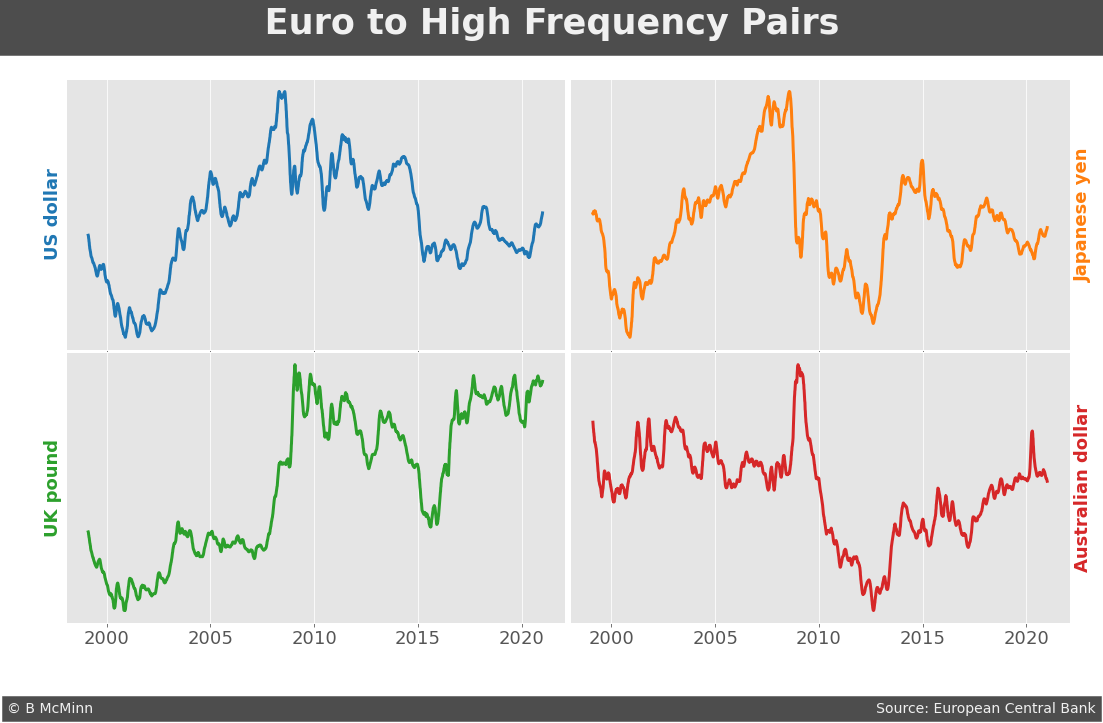

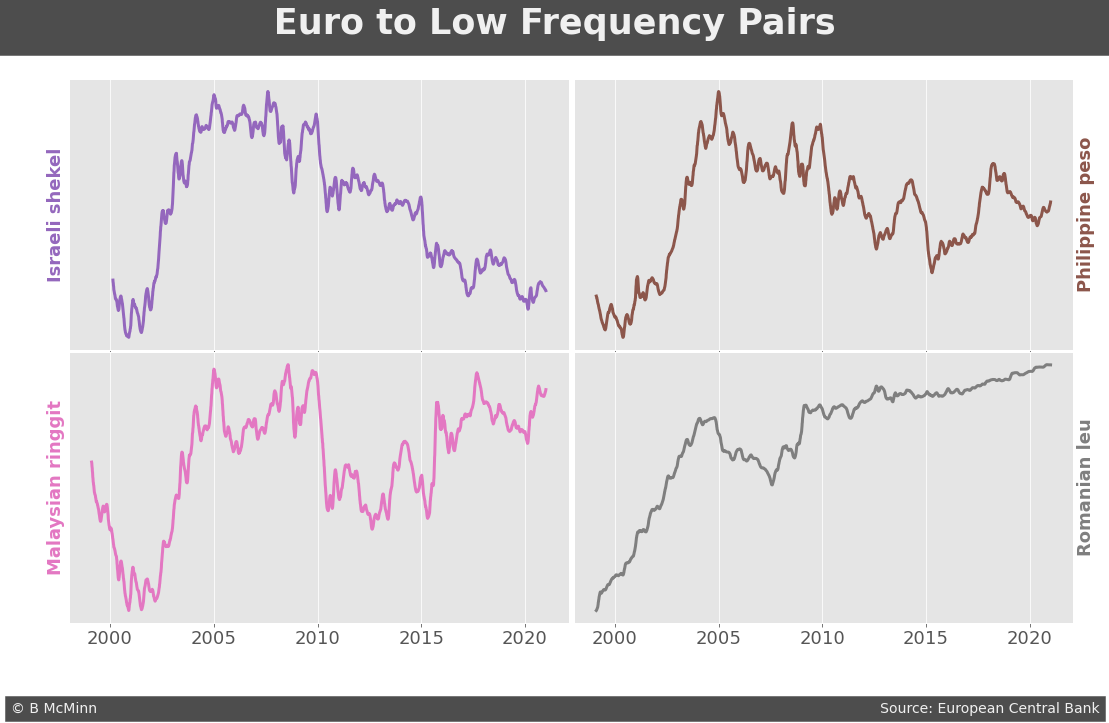

In [3]:
# import matplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.dates as mdates
plt.style.use('ggplot') # set style for graphs

# import colormap and set up color iteration
from matplotlib.pyplot import cm
colors = iter([plt.cm.tab10(i) for i in range(8)])

# create a list of data frames for each currency with log rate of the exchange rate, 30 day rolling mean, and year
df_dict = {}
for currency in x_rates.columns[1:]:
    df_name = currency
    df = x_rates[["date", currency]].copy()
    df = df[df[currency].notna()]
    df["log_rate"] = np.log(df.iloc[:,1]/df.iloc[:,1].shift()) # getting the log of the exchange rate # double check this is the correct way to get log
    df["rolling_mean_30"] = df[currency].rolling(30).mean()
    df["year"] = df["date"].dt.year
    df_dict[currency] = df

# currencies for comparison
high_freq = [df_dict["us_dollar"], df_dict["japanese_yen"], df_dict["uk_pound"], df_dict["australian_dollar"]]
low_freq = [df_dict["israeli_shekel"], df_dict["philippine_peso"], df_dict["malaysian_ringgit"], df_dict["romanian_leu"]]

# line graph showing Euro to each high frequency trading pairs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10))

for ax, currency in zip((ax1, ax2, ax3, ax4), high_freq):
    ax.plot(currency["date"], currency["rolling_mean_30"], linewidth=3, c=next(colors))
for ax in ax1, ax2, ax3, ax4:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
#   ax.set_ylabel(str(currency)) # why not, i can get it to change to a string "currency", but not a variable
ax1.set_ylabel("US dollar", fontsize=18, weight="bold", color="tab:blue")
ax2.set_ylabel("Japanese yen", fontsize=18, weight="bold", color="tab:orange")
ax2.yaxis.set_label_position("right")
ax3.set_ylabel("UK pound", fontsize=18, weight="bold", color="tab:green")
ax4.set_ylabel("Australian dollar", fontsize=18, weight="bold", color="tab:red")
ax4.yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0.01,hspace=0.01)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*21 + "Euro to High Frequency Pairs" + " "*21,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.savefig("euro to high")

# line graph showing Euro to each low frequency trading pairs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10), sharex=True)
for ax, currency in zip((ax1, ax2, ax3, ax4), low_freq):
    ax.plot(currency["date"], currency["rolling_mean_30"], linewidth=3, c=next(colors))
for ax in ax1, ax2, ax3, ax4:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
#   ax.set_ylabel(str(currency)) # why not, i can get it to change to a string "currency", but not a variable
ax1.set_ylabel("Israeli shekel", fontsize=18, weight="bold", color="tab:purple")
ax2.set_ylabel("Philippine peso", fontsize=18, weight="bold", color="tab:brown")
ax2.yaxis.set_label_position("right")
ax3.set_ylabel("Malaysian ringgit", fontsize=18, weight="bold", color="tab:pink")
ax4.set_ylabel("Romanian leu", fontsize=18, weight="bold", color="tab:grey")
ax4.yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0.01,hspace=0.01)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*22 + "Euro to Low Frequency Pairs" + " "*22,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.savefig("euro to low")

## **Euro & Traded Pairs Conclusion**

### High Frequency Pairs
* The US dollar, Japanese yen, and UK pound all show a tight ratio (1:1) with the Euro in the early 2000s.
* Both the Japanese yen and Australian dollar have a period in 2011 or 2012 where the exchange ratio gets tight and then rebounds. Is it really at the same time? Are there any other countries with the same pattern and what could the cause have been?
### Low Frequency Pairs
* The Israeli shekel appears to have steadily closed it's ratio to the Euro over the last two decades, while the Romanian leu is definitely loosing value.
* The shekel and leu appear to be fairly stable, or have low volatility.
* The Israeli shekel, Malaysian ringgit, and Phillipine peso also show the tight ratio of the early 2000s.

## **Alignments**
We can answer some questions and come up with some new ones by overlapping graphs of the exchange rates. Closer looks will often reveal how currencies respond to similar events. The graph below examines the rate for the Euro to the four major currencies simultaneously.

<img src="alignment.png" width="1000" align="center">

## **Alignments Conclusion**
The overlay of the four major currencies shows some very interesting patterns. Broadly speaking, there are periods of strong alignment, divergent alignment, and times with minimal correlation.
* The Japanese yen, UK pound, and US dollar all track closely from the start of data collection through the early years following the September 11 attacks in the US.
* The September 11 attacks also mark a long period where those three currencies have a looser trade ratio with the Euro. It is not evident if this is due to a strong Euro or if the other currencies are trading lower in conjunction.
* In October of 2008 the US President, Treasury Secretary, and Congress enacted the Emergency Economic Stabilization Act, the main pillar of which was the $700 billion Troubled Asset Relief Program (7). This was in response to the 2007-2008 Financial Crises and led to an "unprecedented federal intervention to rescue banks and restore confidence to the finance sector" (8). It marks an interesting point in the Alignment of Euro/High Frequency Pairs graph, and can be seen more closely in the zoomed image below.
<div>
<img src="zoom.png" width="600"/>
</div>
* Lastly, all four trading currencies can be seen responding in a similar way to the 2012 European Debt Crises, by tightening the trading ratio with Euro. On September 06 of that year the European Central Bank announced an open-ended and unlimited period of buying distressed bonds from all Eurozone countries involved in a sovereign state bailout program (9). This was seen as the most dramatic move to that date (10). The Alignment of Euro/High Frequency Pairs graph would seem to indicate that at this point the Euro stopped it's dramatic slide towards a 1:1 ratio and quickly gained ground on the Japanese yen and Australian dollar.

## **Volatility**
A basic explanation of market volatility is the amount of price change for a commodity in a given period of time. This can be seen for stocks, on the FOREX, or in many other places. For traders, especially day and swing traders, volatility is a key component for making financial decisions. To make money in the financial market there must be price movement. Managing the opportunities and risks requires continuous tracking of volatility and associated indicators. This study looks at annual volatility, first for the eight traded currencies and then on a global map for the entire dataset. This broad of a time frame is unlikely to be used for making a specific trade. However, it can reveal patterns that could be used for building a more robust algorithm.

<img src="annual volatility major.png" width="1000" align="center">
<img src="annual volatility minor.png" width="1000" align="center">

<img src="map_gif.gif" width="1000" align="center">

## **Volatility Conclusion**
* The Annual Volatility bar charts appear to show a cyclical pattern in the exchange rate for the Euro to the other trading currencies. It is more apparent with some than others. This pattern repeats at similar but not matching intervals. This suggests that market forces have corresponding effects.
* The bar chart also shows that annual volatility has decreased over the entire span of time for the Romanian leu and, to a lesser extent, the Israeli shekel. This somewhat linear pattern is difficult for capitalizing on. It also points to some specific type of political or economic story.
* The Annual Volatility map confirms that volatility is often distributed evenly throughout all the trading currencies in the data set. It also shows that some outliers retain there uniqueness for multiple years. Russia, Turkey, and South Africa all stand out. The map also reveals the absence of data for large and important geographic areas and specific countries. This includes Central and South America, Africa, and the Middle East as well as Spain, France, and Germany.

## **Further Research**
Examining the historical alignments for the exchange rates of various currencies is a promising avenue. This could be used to illuminate the bi-directional influence of geo-political events and regional economies. Creating a robust interactive tool would allow the researcher increased focus and granularity by allowing them to select specific countries and time periods.

The volatility information this study examined is only the tip of the iceberg for this type of analysis. Incorporating a slider to choose the time frame would greatly increase the ability to make informed trading decisions. This data set provides information that would range down to daily rates, but obviously this could be in much smaller increments. In addition to the bar chart and maps, a line graph with bollinger bars will show more detail. 

## **Citations**
1. Eichengreen, Barry. “Globalizing Capital.” 2009, https://doi.org/10.1515/9781400828814.
2. "Bretton Woods System - Wikipedia". en.wikipedia.org, 2022, https://en.wikipedia.org/wiki/Bretton_Woods_system.
3. Ghizoni. "Nixon Ends Convertibility Of U.S. Dollars To Gold And Announces Wage/Price Controls | Federal Reserve History". Federalreservehistory.org, 2022, https://www.federalreservehistory.org/essays/gold-convertibility-ends.
4. "Foreign Exchange Turnover In April 2019". bis.org, 2022, https://www.bis.org/statistics/rpfx19_fx.htm.
5. "The Most Traded Currency Pairs In Forex (2022 Edition)". FXSSI - Forex Sentiment Board, 2022, https://fxssi.com/the-most-traded-currency-pairs.
6. Chemkaeva. "Daily Exchange Rates Per Euro 1999-2022". kaggle.com, 2022, https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020.
7. "Emergency Economic Stabilization Act Of 2008 - Wikipedia". En.Wikipedia.Org, 2022, https://en.wikipedia.org/wiki/Emergency_Economic_Stabilization_Act_of_2008.
8. David, Marc. "US Government Financial Bailouts". Investopedia, 2022, https://www.investopedia.com/articles/economics/08/government-financial-bailout.asp.
9. "European Debt Crisis - Wikipedia". En.Wikipedia.Org, 2022, https://en.wikipedia.org/wiki/European_debt_crisis#cite_note-ecb-6.
10. Traynor, Ian. "ECB Introduces Unlimited Bond-Buying In Boldest Attempt Yet To End Euro Crisis". The Guardian, 2012, https://www.theguardian.com/business/2012/sep/06/debt-crisis-mario-draghi.

In [5]:
# # need this to correctly get year ticks in DQ server
# years = mdates.YearLocator() # every year
# years_fmt = mdates.DateFormatter('%Y')
# for ax in ax1, ax2, ax3, ax4:
#     ax.xaxis.set_major_locator(years) # format the x ticks
#     ax.xaxis.set_major_formatter(years_fmt)
#     fmt_three_years = mdates.MonthLocator(interval = 36) # Major ticks every 3 years
#     ax.xaxis.set_major_locator(fmt_three_years)
#     ax.set(yticks=[],
#            xlabel="Year")